In [ ]:
pip install opencv.python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install tensorflow

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_path= "/content/drive/MyDrive/WASTE CLASSIFICATION/DATASET/TRAIN"
test_path="/content/drive/MyDrive/WASTE CLASSIFICATION/DATASET/TEST"


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Activation,Dropout,Flatten,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [ ]:
#visualization
x_data=[]
y_data=[]
for category in glob(train_path + '/*'):
    # Iterate through each file in the category
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        if img_array is not None:  # Check if the image was successfully read
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Corrected constant
            x_data.append(img_array)
            y_data.append(category.split('/')[-1])  # Extract category name
        else:
            print(f"Error reading image: {file}")

# Create a DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 1270/1270 [00:43<00:00, 28.97it/s] 
0it [00:00, ?it/s]


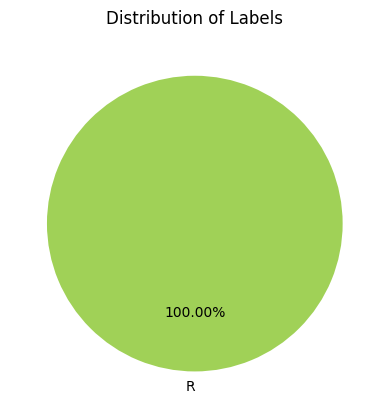

In [ ]:
import matplotlib.pyplot as plt


colors = ['#a0d157', '#c48bb8']


value_counts = data.label.value_counts()
labels = value_counts.index.tolist()

plt.pie(
    value_counts,
    labels=labels,
    autopct='%0.2f%%',
    colors=colors[:len(labels)],
    startangle=90,
    explode=[0.05] * len(labels)
)


plt.title("Distribution of Labels")
plt.show()


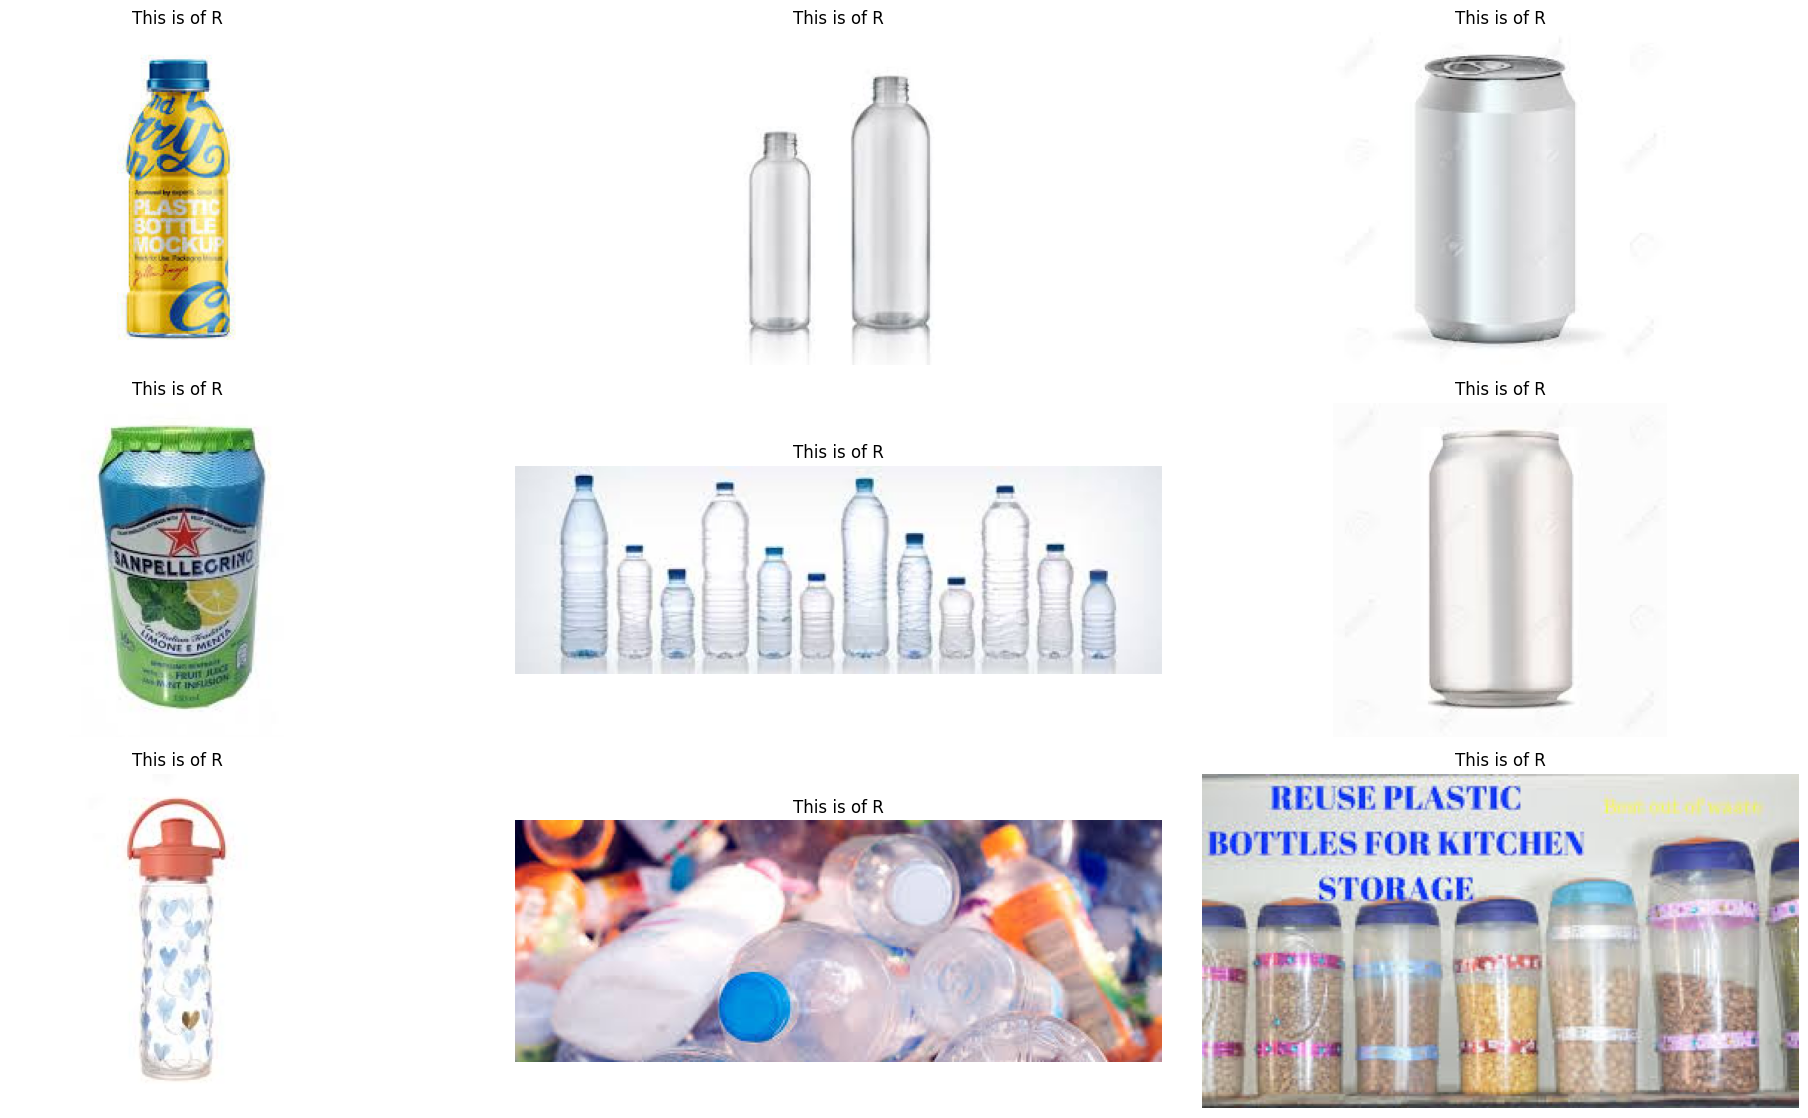

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

num_samples = len(data.label)  # Get the actual dataset size

for i in range(9):
    plt.subplot(4, 3, i + 1)  # Using simple subplot indexing
    index = np.random.randint(num_samples)  # Ensure index is within bounds

    # Fetch label and image safely
    label = data.label.iloc[index] if isinstance(data.label, pd.Series) else data.label[index]
    image = data.image.iloc[index] if isinstance(data.image, pd.Series) else data.image[index]

    plt.title(f'This is of {label}')
    plt.imshow(image)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#CNN
model= Sequential()
model.add(Conv2D(32,(3,3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add (MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add (MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
batch_size=256



In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(train_path,
                                                target_size=(224,224),
                                                batch_size=batch_size,
                                                color_mode="rgb",
                                                class_mode='categorical')

test_generator=test_datagen.flow_from_directory(test_path,
                                                target_size=(224,224),
                                                batch_size=batch_size,
                                                color_mode="rgb",
                                                class_mode='categorical')

Found 1270 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
hist=model.fit(train_generator,
               epochs=10,
               validation_data=test_generator)